In [192]:
#### Importing Libraries ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import random

#Importing dataset
dataset = pd.read_csv('churn_data.csv') 

## Exploratory Data Analysis

In [5]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [6]:
# Distribution of Numerical Variables
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


#### Cleaning Data

In [12]:
# Removing NaN
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

### Note:
     1. Because 'credit_score' and 'rewards_earned' have too many NaN values, they gonna be removed!
     2. It will be imputed missing values in 'age'

In [66]:
# Removing credit_score and rewards_earned
data_clean_ = dataset.drop(['credit_score', 'rewards_earned'], axis = 1)

In [102]:
#Selecting features only with numerical values
data_clean_num = data_clean_.select_dtypes(exclude = 'object')

data_clean_obj = data_clean_.select_dtypes(include = 'object')

In [104]:
data_clean_obj.dtypes

housing         object
payment_type    object
zodiac_sign     object
dtype: object

In [116]:
from sklearn.impute import SimpleImputer

#Imputer object 
my_imputer = SimpleImputer(strategy = 'mean')

#Imputing missing values
data_clean_num_imputed = pd.DataFrame(my_imputer.fit_transform(data_clean_num))

#Imputation removes column names and row numbers, putting them back
data_clean_num_imputed.columns = data_clean_num.columns
data_clean_num_imputed.index = data_clean_num.index

In [118]:
data_clean_num_imputed.isnull().sum()

user                       0
churn                      0
age                        0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [119]:
#droping 'users' and 'churn'
dataset2 = data_clean_num_imputed.drop(columns = ['user', 'churn'])

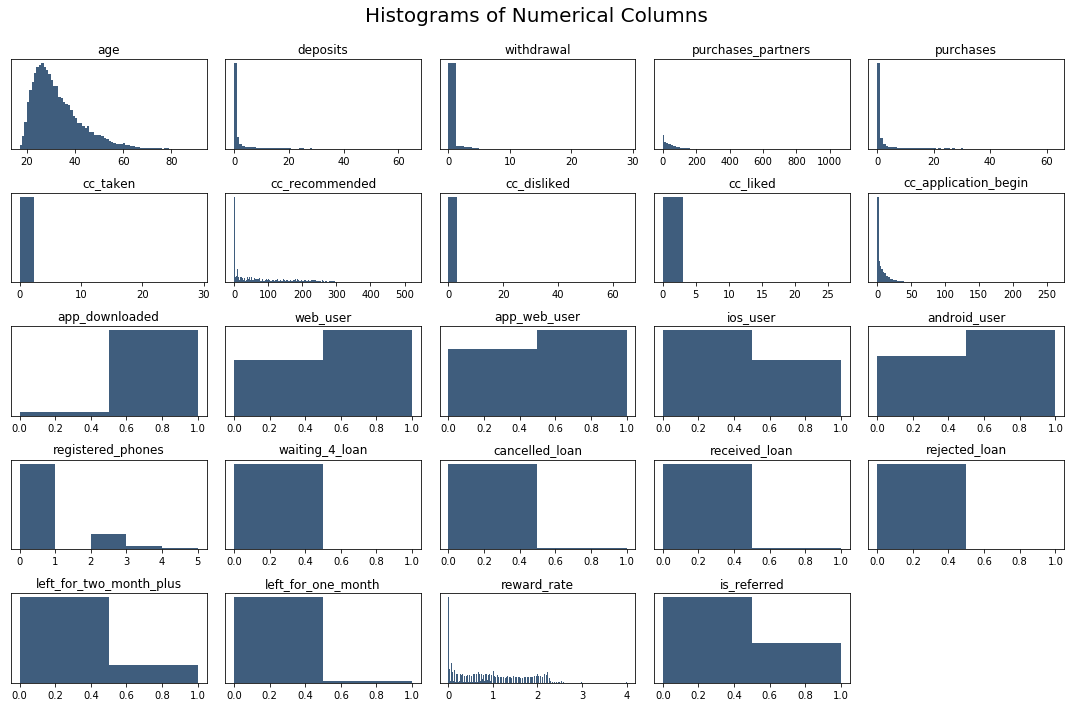

In [121]:
#Making Histogram
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


### Note:
        1. To have better understanding the binary variables and object types, gonna be made pie chart
    

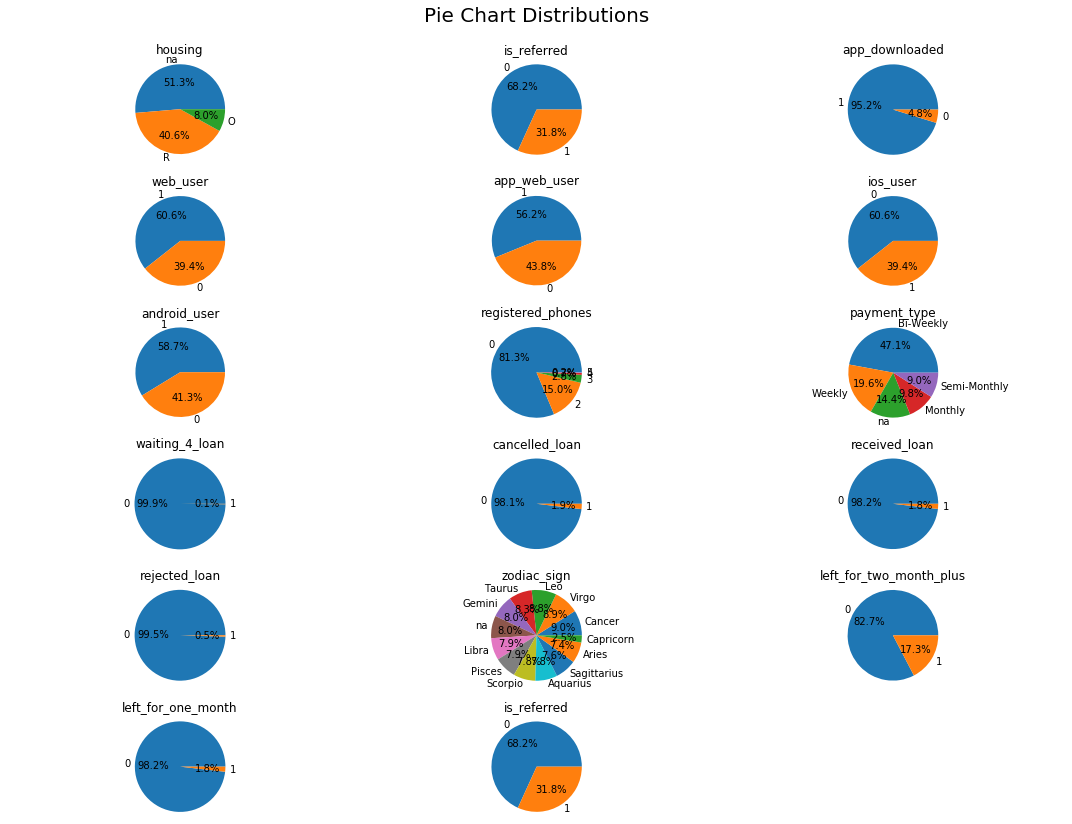

In [123]:
## Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### Note:
        1.'waiting_4_loan', 'rejected_loan', 'left_for_one_month', 'cancelled_loan', 'recevied_loan'
        are not balanced(uneven) meaning binary 1 has very little percentenge, it needs to be check with dependent         variable as well for balance

In [134]:
## Exploring Uneven Features
print(dataset[dataset2.waiting_4_loan == 1].churn.value_counts(),'\n')
print(dataset[dataset2.cancelled_loan == 1].churn.value_counts(),'\n')
print(dataset[dataset2.received_loan == 1].churn.value_counts(),'\n')
print(dataset[dataset2.rejected_loan == 1].churn.value_counts(),'\n')
print(dataset[dataset2.left_for_one_month == 1].churn.value_counts(),'\n')

0    27
1     8
Name: churn, dtype: int64 

1    274
0    234
Name: churn, dtype: int64 

1    292
0    199
Name: churn, dtype: int64 

1    107
0     25
Name: churn, dtype: int64 

1    266
0    222
Name: churn, dtype: int64 



### Note:
        1. After the exploration the uneven features with binary 1 has good balance with the dependent variable, so we don't assume that those gonna be strongly biased.

In [137]:
#Concatinating numerical with object types
data = pd.concat([data_clean_num_imputed, data_clean_obj], axis = 1)

In [141]:
## Getting numerical columns with no 'user' and 'churn'
numerical_columns = data_clean_num_imputed.drop(['user','churn'], axis = 1)

In [145]:
data.drop(columns = ['housing', 'payment_type','registered_phones', 'zodiac_sign','user','churn']
         ).corrwith(dataset.churn)

age                       -0.063202
deposits                  -0.135327
withdrawal                -0.068503
purchases_partners        -0.260679
purchases                 -0.135867
cc_taken                   0.058400
cc_recommended            -0.198413
cc_disliked                0.009430
cc_liked                   0.010893
cc_application_begin      -0.118498
app_downloaded            -0.055504
web_user                   0.035201
app_web_user               0.011232
ios_user                   0.017125
android_user              -0.036663
waiting_4_loan            -0.013553
cancelled_loan             0.035290
received_loan              0.049974
rejected_loan              0.056463
left_for_two_month_plus    0.005150
left_for_one_month         0.036149
reward_rate               -0.167016
is_referred               -0.083277
dtype: float64

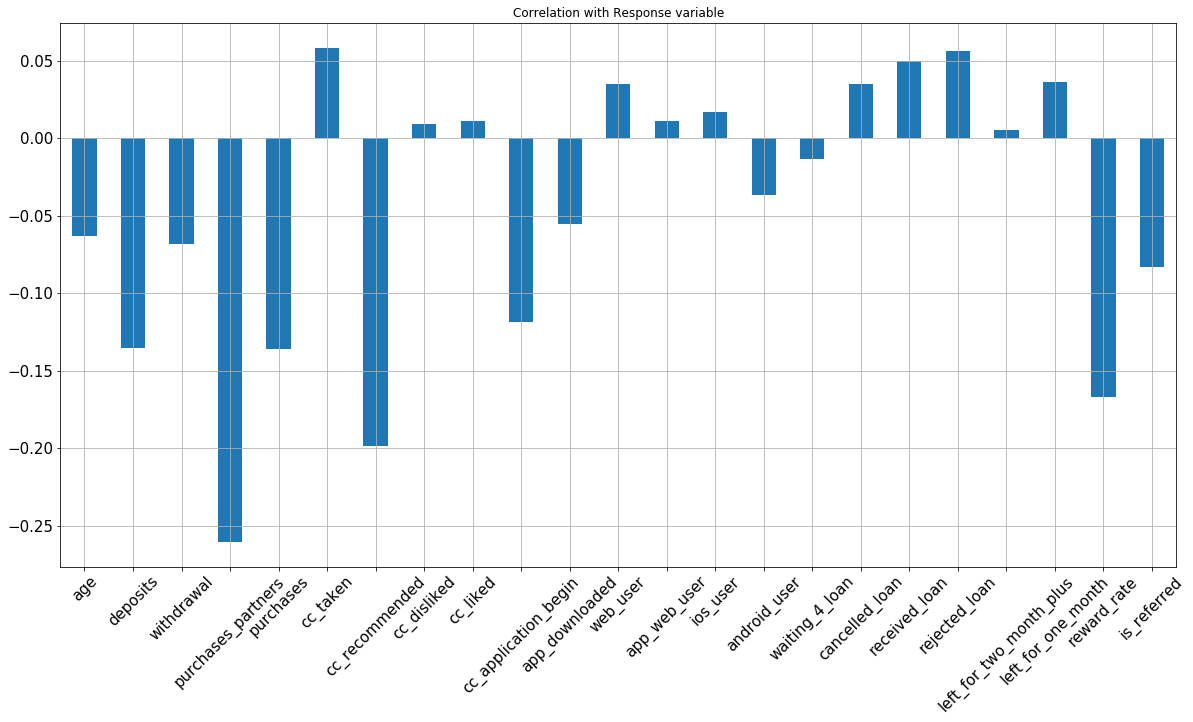

In [144]:
## Correlation with Response Variable
data.drop(columns = ['housing', 'payment_type','registered_phones', 'zodiac_sign','user','churn']
         ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
                                            title = 'Correlation with Response variable',
                                            fontsize = 15, rot = 45,
                                            grid = True
                                           )

### Note:
                 Features with more than 10%:
        1. 'deposits'             -0.135: Less deposits more likely to churn
        2. 'purchases_partners'   -0.260: Less purchases_partner more likely to churn
        3. 'purchases'            -0.135: Less purchases more likely to churn
        4. 'cc_recommended'       -0.198: Less recomendation more likely to churn
        5. 'cc_application_begin' -0.118: Less cc_application_begin more likely to churn
        6. 'reward_rate'          -0.167: Less reward_rate more likely to churn

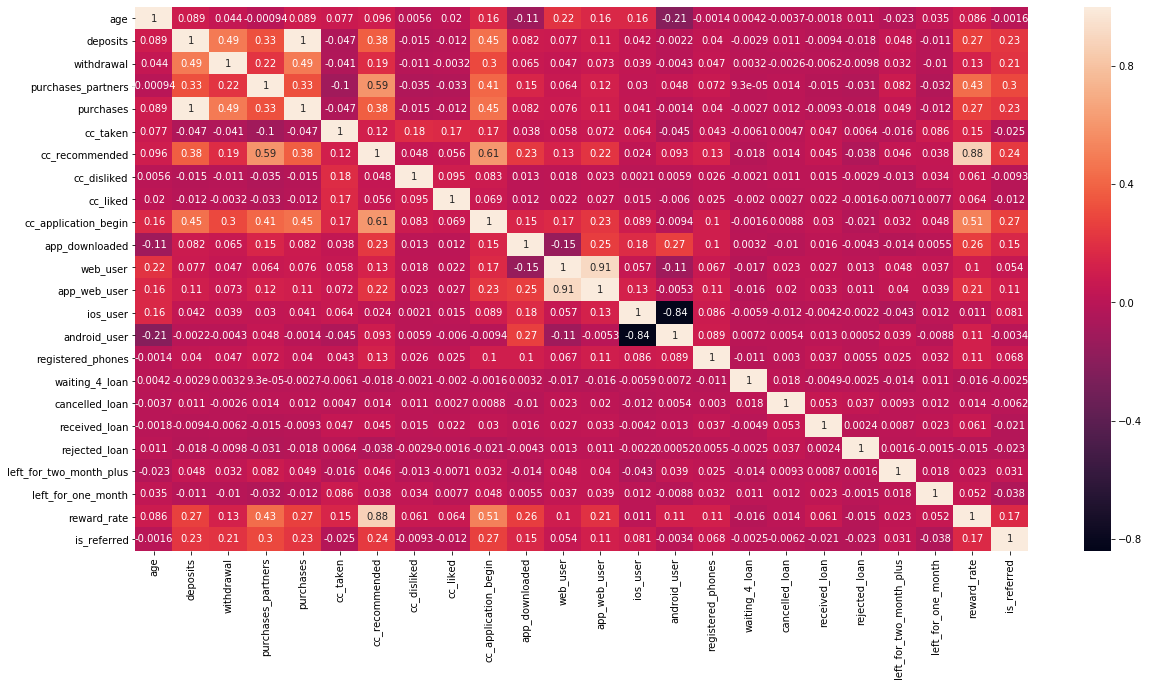

In [148]:
# Checking the correlation between the variables
# parameter annot = True to show the values in the heatmap
plt.figure(figsize = (20,10))
sns.heatmap(data.drop(['user', 'churn'], axis = 1).corr(), annot = True)

### Note:
            Strongly Correlated independent features:
        1.purchases and deposits:         1.00
        2.reward_rate and cc_recommended: 0.88
        3.app_web_user and web_user:      0.91
        4.android_user and ios_user:     -0.84

In [149]:
# Removing some correlated independent features, and choosing to remove with less corr

#First checking the correlation with dependent variable of each feature
## purchases    -0.135 and deposits        -0.135 = either of them, but 'deposits'
## reward_rate  -0.167 and cc_recommended  -0.198 = 'reward_rate'
## app_web_user  0.011 and web_user         0.035 = 'app_web_user'
## ios_user      0.017 and android_user    -0.036 = 'ios_user'

data_droped = data.drop(['deposits', 'reward_rate', 'app_web_user', 'ios_user'], axis = 1)

In [151]:
data_droped.head()

,user,churn,age,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,is_referred,housing,payment_type,zodiac_sign
0,55409.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,na,Bi-Weekly,Leo
1,23547.0,0.0,28.0,0.0,1.0,0.0,0.0,96.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,R,Weekly,Leo
2,58313.0,0.0,35.0,2.0,86.0,47.0,0.0,285.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,R,Semi-Monthly,Capricorn
3,8095.0,0.0,26.0,3.0,38.0,25.0,0.0,74.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,R,Bi-Weekly,Capricorn
4,61353.0,1.0,27.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,na,Bi-Weekly,Aries


In [152]:
#Saving this dataset
data_droped.to_csv('new_churn_data.csv', index = False)

## Data Pre-Processing 

In [160]:
# Splitting Independent and Response Variables
X = data_droped.drop('churn', axis = 1)
y = data_droped['churn']

In [163]:
#Separeting 'user' from the dataset
user_identifier = X['user']
X = X.drop('user', axis = 1)

In [167]:
# One-Hot Encoding
#Explorting categorical features
print(X['housing'].unique())
print(X['payment_type'].unique())
print(X['zodiac_sign'].unique())

['na' 'R' 'O']
['Bi-Weekly' 'Weekly' 'Semi-Monthly' 'na' 'Monthly']
['Leo' 'Capricorn' 'Aries' 'Taurus' 'Cancer' 'Sagittarius' 'Aquarius'
 'Virgo' 'Libra' 'Gemini' 'Scorpio' 'Pisces' 'na']


### Note:
       1. One hot encoding will be applied to the categorical variables.
       2. To avoid dummy variable trap, it is going to be removed 'na's from each feature

In [168]:
# Encoding dataset
X_dummies = pd.get_dummies(X)

In [173]:
#Droping 'housing_na', 'payment_type_na', 'zodiac_sign_na'
X_dummies_droped = X_dummies.drop(['housing_na', 'payment_type_na', 'zodiac_sign_na'],axis = 1)

In [175]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies_droped, y, test_size = 0.2, random_state = 0)

In [193]:
# Balancing the Training Set
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

#Checking which index is with more values
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

#Randomly selecting values of higher values with the length of lower
random.seed(0)
higher = np.random.choice(higher, len(lower))
lower = np.asarray(lower)

#Concatenating both indexes
new_indexes = np.concatenate((lower, higher))

#Applying nex indexes in X_train and y_train
X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [198]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc.transform(X_test))

#Scaling removes columns and indexes putting them back
X_train_scaled.columns = X_train.columns
X_test_scaled.columns = X_test.columns

X_train_scaled.index = X_train.index
X_test_scaled.index = X_test.index

X_train = X_train_scaled
X_test = X_test_scaled

## Model Building

In [200]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
# Predicting Test Set
predictions = classifier.predict(X_test)

In [206]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, classification_report

#Confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[1660, 1499],
       [ 579, 1662]])

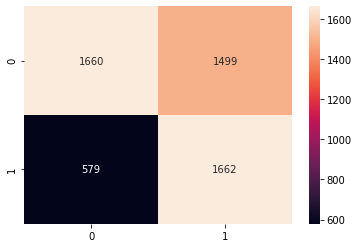

In [209]:
# @param annot - to show the numbers
# @param fmy - formating to numbers to integer
sns.heatmap(cm, annot=True, fmt="d")

### Note:
        1. Too many type I errors 1499

In [212]:
#Positive precision score = true positives / true positives + false positives: 1662 / (1662+1499) = 0.53
## Meaning of all the positive predictions what percentage is true

#Positive recall score = true positives / true positives + false negatives: 1662 / (1662+579) = 0.74
## Meaning of all the actual positives predictions what percentage is true

#f1-score precision + recall / 2: 0.74 + 0.53 / 2 = 0.62

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.74      0.53      0.62      3159
         1.0       0.53      0.74      0.62      2241

    accuracy                           0.62      5400
   macro avg       0.63      0.63      0.62      5400
weighted avg       0.65      0.62      0.62      5400



In [217]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier, X_train, y_train, cv = 10)
accuracies.mean()

/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

0.6437885016697105

In [229]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ['Features']), 
           pd.DataFrame(np.transpose(classifier.coef_), columns = ['Coef'])], axis = 1)

,Features,Coef
0,age,-0.174351
1,withdrawal,0.061800
2,purchases_partners,-0.708427
3,purchases,-0.140936
4,cc_taken,0.042800
5,cc_recommended,-0.087987
6,cc_disliked,0.012555
7,cc_liked,0.038021
8,cc_application_begin,0.004054
9,app_downloaded,-0.000466


### Note:
        1. The biggest influence to the dependent variables are: purchases_partners	   -0.708, 
                                                                 purchases	            -0.140,
                                                                 web_user	              0.123,
                                                                 registered_phones	     0.137,
                                                                 rejected_loan	         0.113,
                                                                 payment_type_Bi-Weekly   -0.101

## Feature Selection

In [230]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [231]:
# Model to Test
classifier = LogisticRegression()

# Selecting Best X Features
rfe = RFE(classifier, 20)
rfe.fit(X_train, y_train)

/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [232]:
# summarize the selection of the attributes

#rfe.support_ returns a list with boolean variables describing which feature is in top 20
print(rfe.support_)

#rfe.ranking_ returns a list with ranking of each feature 1 means it is in top selected features
print(rfe.ranking_)

[ True  True  True  True  True  True False  True False False  True  True
  True False  True  True  True  True  True  True  True False  True  True
  True False False False False False False False False False False False
 False False]
[ 1  1  1  1  1  1 15  1 17 19  1  1  1  2  1  1  1  1  1  1  1  9  1  1
  1 10  3 12 14 13  8  7  4 11 16  5  6 18]


In [237]:
### Fitting and Predictings with new selected features
from sklearn.linear_model import LogisticRegression

selected_column_names = X_train.columns[rfe.support_]

classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train[selected_column_names], y_train)

# Predicting Test Set
predictions2 = classifier2.predict(X_test[selected_column_names])

/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [238]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, classification_report

#Confusion matrix
cm2 = confusion_matrix(y_test, predictions2)
cm2

array([[1662, 1497],
       [ 570, 1671]])

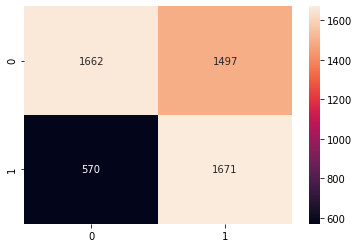

In [239]:
# @param annot - to show the numbers
# @param fmy - formating to numbers to integer
sns.heatmap(cm2, annot=True, fmt="d")

In [241]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

         0.0       0.74      0.53      0.62      3159
         1.0       0.53      0.75      0.62      2241

    accuracy                           0.62      5400
   macro avg       0.64      0.64      0.62      5400
weighted avg       0.65      0.62      0.62      5400



In [243]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(classifier2, X_train[selected_column_names], y_train, cv = 10)
accuracies2.mean()

/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/berayhayrulah/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

0.6425008956061438

In [244]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train[selected_column_names].columns, columns = ['Features']), 
           pd.DataFrame(np.transpose(classifier2.coef_), columns = ['Coef'])], axis = 1)

,Features,Coef
0,age,-0.175238
1,withdrawal,0.062393
2,purchases_partners,-0.712592
3,purchases,-0.139054
4,cc_taken,0.047411
5,cc_recommended,-0.078329
6,cc_liked,0.038635
7,web_user,0.125135
8,android_user,-0.071848
9,registered_phones,0.139134


## End of Model

In [259]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = predictions2
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)
final_results

,user,churn,predicted_churn
0,61353.0,1.0,1.0
1,67679.0,0.0,0.0
2,21269.0,0.0,0.0
3,69531.0,0.0,1.0
4,25997.0,0.0,0.0
...,...,...,...
5395,68179.0,1.0,0.0
5396,19540.0,0.0,1.0
5397,24291.0,1.0,1.0
5398,23740.0,0.0,1.0
